## Q2: Is there any pattern between the profitability and the number of international release?


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
#load individual files to individual dataframes
tmdb_movies = pd.DataFrame(pd.read_csv('./zippedData/tmdb.movies.csv'))
imdb_crew = pd.DataFrame(pd.read_csv('./zippedData/imdb.title.crew.csv'))
tn_budgets = pd.DataFrame(pd.read_csv('./zippedData/tn.movie_budgets.csv'))
imdb_ratings = pd.DataFrame(pd.read_csv('./zippedData/imdb.title.ratings.csv'))
imdb_name_basics = pd.DataFrame(pd.read_csv('./zippedData/imdb.name.basics.csv'))
imdb_principals = pd.DataFrame(pd.read_csv('./zippedData/imdb.title.principals.csv'))
imdb_akas = pd.DataFrame(pd.read_csv('./zippedData/imdb.title.akas.csv'))
bom_gross = pd.DataFrame(pd.read_csv('./zippedData/bom.movie_gross.csv'))
imdb_title_basics = pd.DataFrame(pd.read_csv('./zippedData/imdb.title.basics.csv'))

In [3]:
#rename similar title identification columns for cleaner joins

imdb_crew = imdb_crew.rename({'tconst': 'title_id'}, axis=1)
imdb_ratings = imdb_ratings.rename({'tconst': 'title_id'}, axis=1)
imdb_principals = imdb_principals.rename({'tconst': 'title_id'}, axis=1)
imdb_title_basics = imdb_title_basics.rename({'tconst': 'title_id'}, axis=1)
imdb_title_basics = imdb_title_basics.rename({'primary_title': 'movie'}, axis=1)
imdb_name_basics = imdb_name_basics.rename({'nconst': 'crew_id'}, axis=1)
bom_gross = bom_gross.rename({'title': 'movie'}, axis=1)


#prepare budget and gross amounts for to_numeric
tn_budgets.production_budget = tn_budgets.production_budget.apply(lambda x: x.strip('$').replace(',',''))
tn_budgets.worldwide_gross = tn_budgets.worldwide_gross.apply(lambda x: x.strip('$').replace(',',''))
tn_budgets.domestic_gross = tn_budgets.domestic_gross.apply(lambda x: x.strip('$').replace(',',''))
#into numbers
tn_budgets[['production_budget', 'worldwide_gross', 'domestic_gross']] = tn_budgets[['production_budget', 
                                                                                     'worldwide_gross', 'domestic_gross']].apply(pd.to_numeric)

In [4]:
tn_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget     int64
domestic_gross        int64
worldwide_gross       int64
dtype: object

In [5]:
tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [6]:
tn_budgets.eval("total_profit = worldwide_gross - production_budget", inplace=True)
# tn_budgets = tn_budgets.sort_values(['total_profit'], ascending=False)

In [7]:
tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [8]:
# tn_budgets.set_index('movie', inplace=True)

In [9]:
imdb_title_basics.head()

,title_id,movie,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [10]:
# imdb_title_basics.set_index('movie', inplace=True)
# imdb_title_basics.head()

In [11]:
joined_df1 = tn_budgets.merge(imdb_title_basics, left_on='movie', right_on='movie')

In [12]:
joined_df1.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,title_id,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,tt1775309,Abatâ,2011,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,tt6565702,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,tt2395427,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"


In [13]:
imdb_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [14]:
joined_df1 = joined_df1.merge(imdb_akas, left_on='title_id', right_on='title_id', left_index=True)

In [24]:
joined_df1.head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,title_id,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title
17464,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,tt1775309,Abatâ,2011,93.0,Horror,1,Abatâ,JP,NaN,NaN,NaN,0.0
17465,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,tt1775309,Abatâ,2011,93.0,Horror,2,Avatar,XWW,en,imdbDisplay,NaN,0.0
17466,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,tt1775309,Abatâ,2011,93.0,Horror,3,Abatâ,NaN,NaN,original,NaN,1.0
101961,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,tt2495766,Titanic,2012,NaN,Adventure,1,Titanic,GB,NaN,NaN,NaN,0.0
311326,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",1,Mary Lou,US,NaN,NaN,fake working title,0.0
311316,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",10,Avengers: Infinity War,AR,NaN,imdbDisplay,NaN,0.0
311318,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",12,Osvetnici: Rat beskraja,RS,NaN,imdbDisplay,NaN,0.0
311319,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",13,Avengers: Infinity War,XWW,en,imdbDisplay,NaN,0.0
311320,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",14,Avengers: Infinity War,US,en,NaN,NaN,0.0
311321,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",15,Vengadores: La guerra del infinito - 1ª parte,ES,NaN,alternative,NaN,0.0


In [20]:
def sort_list(data, col):
    data = data.sort_values(by=col, ascending=False, inplace=True)

In [21]:
sort_list(joined_df1, 'total_profit')

In [107]:
joined_df1.title_id.value_counts().head(20)

tt2224026    105
tt0848228     98
tt1014759     84
tt1661199     78
tt1343092     78
tt2771200     76
tt1502407     75
tt1401152     74
tt1179056     74
tt3040964     74
tt1289401     72
tt6139732     72
tt1386703     70
tt0800320     70
tt0837563     68
tt2345759     68
tt1502712     66
tt0816462     66
tt2053463     64
tt1155076     64
Name: title_id, dtype: int64

In [23]:
joined_df1.describe()

,id,production_budget,domestic_gross,worldwide_gross,total_profit,start_year,runtime_minutes,ordering,is_original_title
count,46217.000000,4.621700e+04,4.621700e+04,4.621700e+04,4.621700e+04,46217.000000,45653.000000,46217.000000,46216.000000
mean,50.891858,5.262955e+07,6.886994e+07,1.754540e+08,1.228245e+08,2013.811822,108.571726,13.921652,0.052709
std,28.330801,6.031353e+07,9.530625e+07,2.632969e+08,2.197931e+08,2.585597,18.814570,10.139243,0.223454
min,1.000000,1.400000e+03,0.000000e+00,0.000000e+00,-2.002376e+08,2010.000000,1.000000,1.000000,0.000000
25%,27.000000,1.150000e+07,8.224288e+06,1.882649e+07,4.710900e+05,2012.000000,96.000000,5.000000,0.000000
50%,51.000000,3.000000e+07,3.589354e+07,7.323926e+07,3.751349e+07,2014.000000,106.000000,12.000000,0.000000
75%,75.000000,7.000000e+07,8.452543e+07,2.117390e+08,1.375707e+08,2016.000000,119.000000,21.000000,0.000000
max,100.000000,4.250000e+08,7.605076e+08,2.776345e+09,2.351345e+09,2021.000000,360.000000,55.000000,1.000000


In [114]:
joined_df2 = joined_df1.groupby(['title_id','movie'])['region'].nunique().sort_values(ascending=False).head(10)
joined_df2


title_id   movie                                           
tt2948356  Zootopia                                            45
tt2096673  Inside Out                                          45
tt2820852  Furious 7                                           44
tt1648190  The Dark Tower                                      44
tt0398286  Tangled                                             44
tt2310332  The Hobbit: The Battle of the Five Armies           43
tt1637688  In Time                                             43
tt1217209  Brave                                               43
tt1790809  Pirates of the Caribbean: Dead Men Tell No Tales    43
tt4630562  The Fate of the Furious                             42
Name: region, dtype: int64

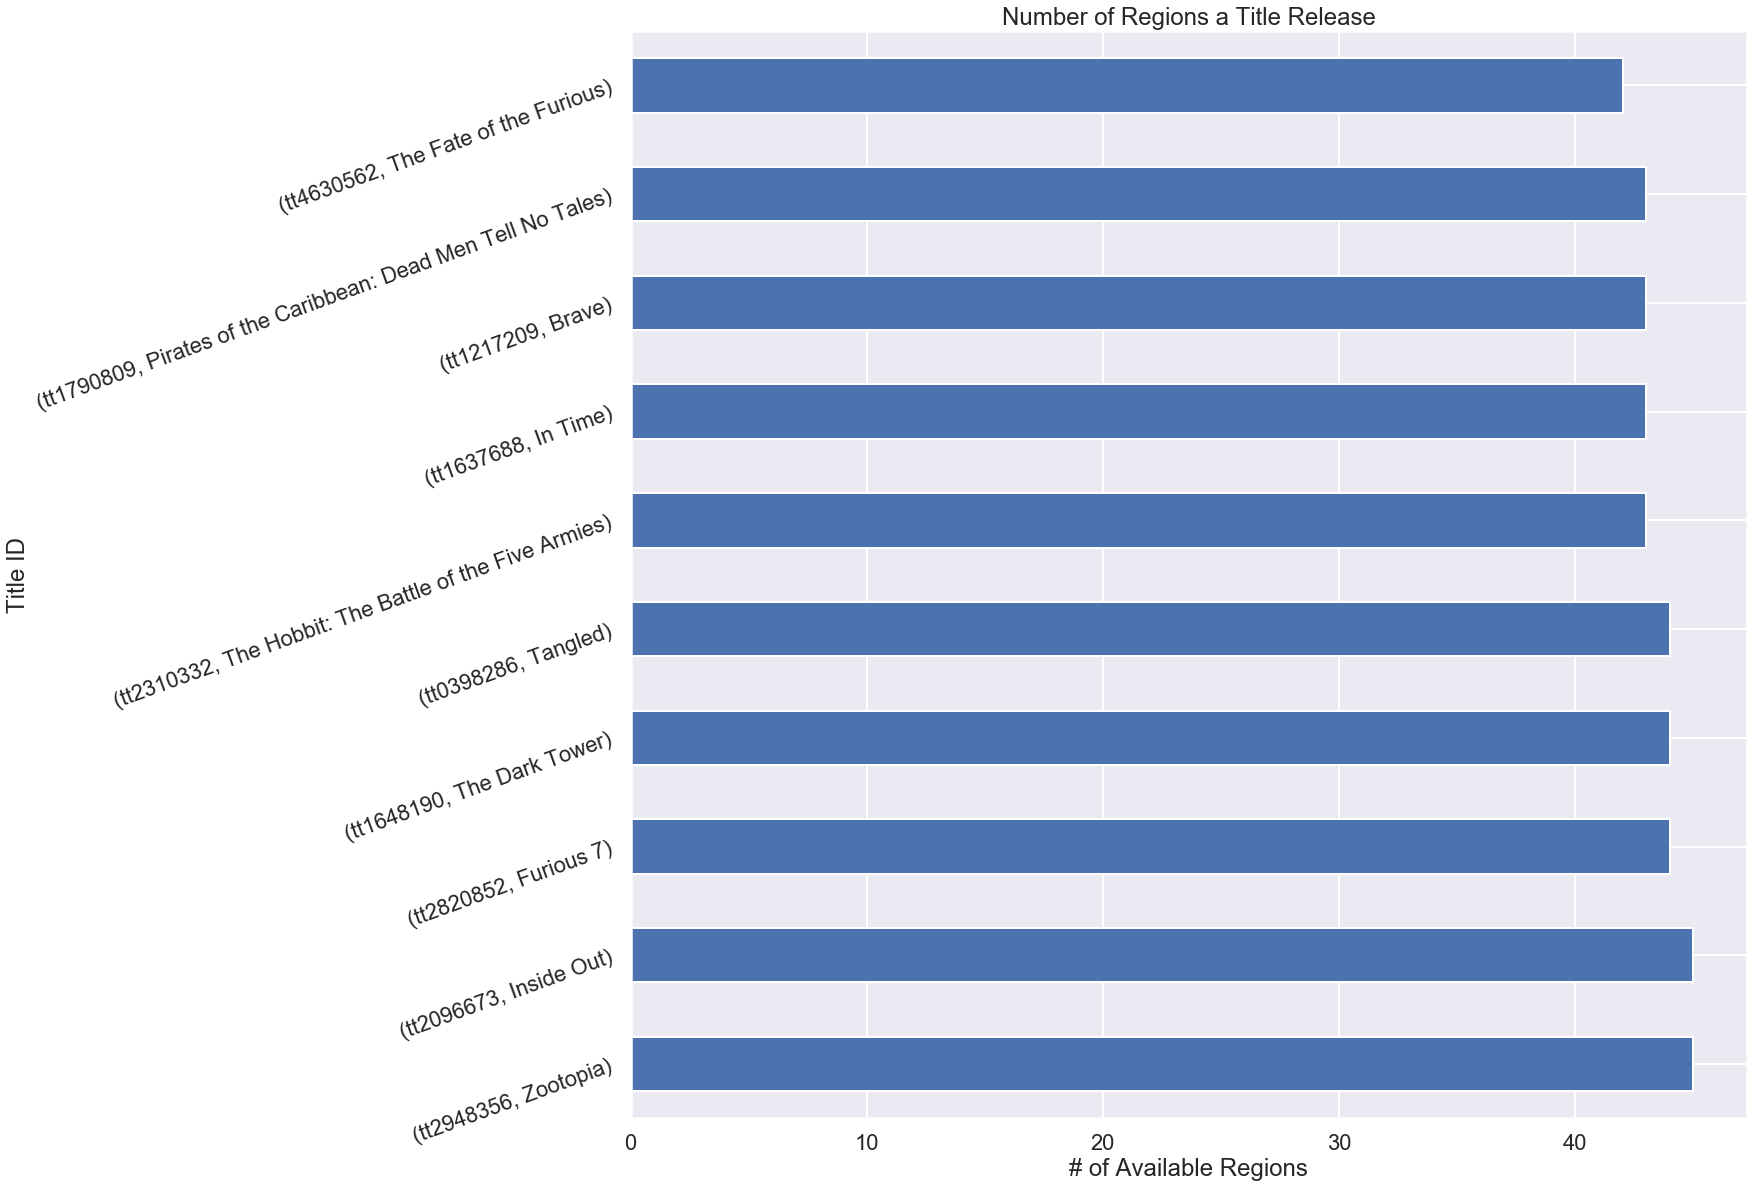

In [115]:
plt.rcParams.update({'font.size': 22})

sns.set()
sns.set_context('poster')
chart = joined_df2.plot(kind='barh', figsize=(20,20))
chart.set_yticklabels(chart.get_yticklabels(), rotation=20)
plt.ylabel('Title ID')
plt.xlabel('# of Available Regions')
plt.title('Number of Regions a Title Release')
plt.show()

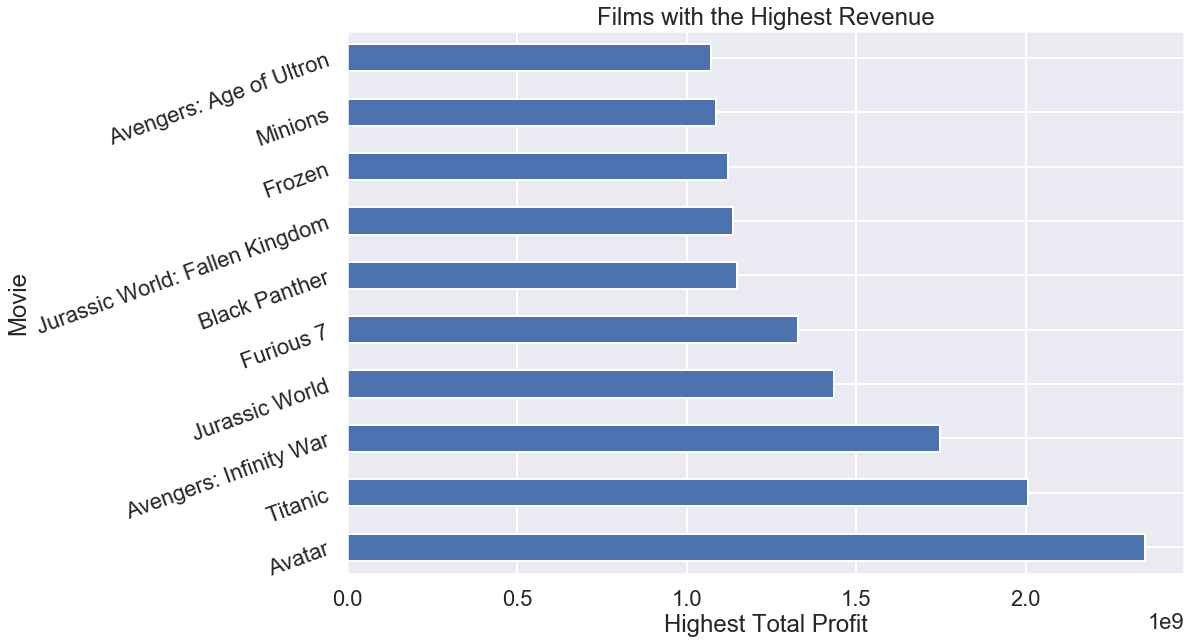

In [119]:
joined_df3 = joined_df1.groupby(['movie'])['total_profit'].mean().sort_values(ascending=False).head(10)
joined_df3

plt.rcParams.update({'font.size': 22})

sns.set()
sns.set_context('poster')
chart2 = joined_df3.plot(kind='barh', figsize=(15,10))
chart2.set_yticklabels(chart2.get_yticklabels(), rotation=20)
plt.ylabel('Movie')
plt.xlabel('Highest Total Profit')
plt.title('Films with the Highest Revenue')
plt.show()

### Insights/Findings/Recommendations

**Findings**

After looking into the relationship between the profitability and the number of regions where a single film is released, I found that there is no apparent relationships between the two.

**Recommendations**


**Next Steps**
* Plan on exploring further correlations between profitability and directors, studios, and international releases  
* If possible, gather additional regional release information.